
# ARIMA and Seasonal ARIMA


## Autoregressive Integrated Moving Averages

The general process for ARIMA models is the following:
* Visualize the Time Series Data
* Make the time series data stationary
* Plot the Correlation and AutoCorrelation Charts
* Construct the ARIMA Model or Seasonal ARIMA based on the data
* Use the model to make predictions




In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df=pd.read_csv('AAPL.csv')

In [ ]:
df=df.iloc[:106]


In [ ]:
df.shape

(106, 15)

In [ ]:
df

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,101,AAPL,2015-10-19 00:00:00+00:00,111.730,111.750,110.11,110.80,29759153,103.426850,103.445364,101.927240,102.565963,29759153,0.0,1.0
102,102,AAPL,2015-10-20 00:00:00+00:00,113.770,114.170,110.82,111.34,48967763,105.315249,105.685523,102.584476,103.065833,48967763,0.0,1.0
103,103,AAPL,2015-10-21 00:00:00+00:00,113.760,115.580,113.70,114.00,42326974,105.305992,106.990740,105.250451,105.528157,42326974,0.0,1.0
104,104,AAPL,2015-10-22 00:00:00+00:00,115.500,115.500,114.10,114.33,41654089,106.916685,106.916685,105.620725,105.833633,41654089,0.0,1.0


In [ ]:
df.tail()

,Unnamed: 0,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
101,101,AAPL,2015-10-19 00:00:00+00:00,111.73,111.750,110.11,110.80,29759153,103.426850,103.445364,101.927240,102.565963,29759153,0.0,1.0
102,102,AAPL,2015-10-20 00:00:00+00:00,113.77,114.170,110.82,111.34,48967763,105.315249,105.685523,102.584476,103.065833,48967763,0.0,1.0
103,103,AAPL,2015-10-21 00:00:00+00:00,113.76,115.580,113.70,114.00,42326974,105.305992,106.990740,105.250451,105.528157,42326974,0.0,1.0
104,104,AAPL,2015-10-22 00:00:00+00:00,115.50,115.500,114.10,114.33,41654089,106.916685,106.916685,105.620725,105.833633,41654089,0.0,1.0
105,105,AAPL,2015-10-23 00:00:00+00:00,119.08,119.228,116.33,116.70,59366914,110.230639,110.367641,107.685004,108.027508,59366914,0.0,1.0


In [ ]:
df=df[['date','close']]
df

,date,close
0,2015-05-27 00:00:00+00:00,132.045
1,2015-05-28 00:00:00+00:00,131.780
2,2015-05-29 00:00:00+00:00,130.280
3,2015-06-01 00:00:00+00:00,130.535
4,2015-06-02 00:00:00+00:00,129.960
...,...,...
101,2015-10-19 00:00:00+00:00,111.730
102,2015-10-20 00:00:00+00:00,113.770
103,2015-10-21 00:00:00+00:00,113.760
104,2015-10-22 00:00:00+00:00,115.500


In [ ]:
df.tail()

,date,close
101,2015-10-19 00:00:00+00:00,111.73
102,2015-10-20 00:00:00+00:00,113.77
103,2015-10-21 00:00:00+00:00,113.76
104,2015-10-22 00:00:00+00:00,115.50
105,2015-10-23 00:00:00+00:00,119.08


In [ ]:
# Convert Month into Datetime
df['date']=pd.to_datetime(df['date'])

<ipython-input-107-7e472c32db7d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df['date'])


In [ ]:
df.head()

,date,close
0,2015-05-27 00:00:00+00:00,132.045
1,2015-05-28 00:00:00+00:00,131.780
2,2015-05-29 00:00:00+00:00,130.280
3,2015-06-01 00:00:00+00:00,130.535
4,2015-06-02 00:00:00+00:00,129.960


In [ ]:
df.set_index('date',inplace=True)

In [ ]:
df.head()

,close
date,
2015-05-27 00:00:00+00:00,132.045
2015-05-28 00:00:00+00:00,131.780
2015-05-29 00:00:00+00:00,130.280
2015-06-01 00:00:00+00:00,130.535
2015-06-02 00:00:00+00:00,129.960


In [ ]:
df.describe()

,close
count,106.000000
mean,119.038255
std,7.671074
min,103.120000
25%,112.590000
50%,116.345000
75%,126.712500
max,132.070000


## Step 2: Visualize the Data

<Axes: xlabel='date'>

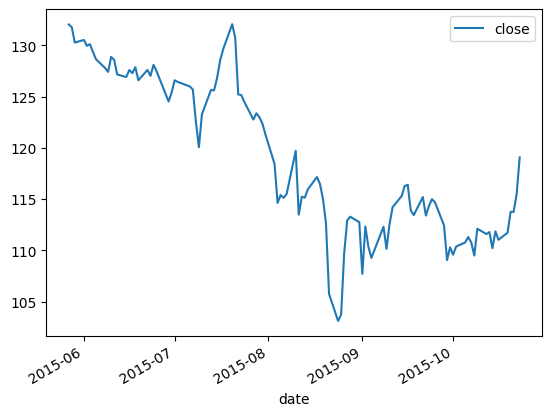

In [ ]:
df.plot()

In [ ]:
### Testing For Stationarity

from statsmodels.tsa.stattools import adfuller

In [ ]:
test_result=adfuller(df['close'])

In [ ]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")


In [ ]:
adfuller_test(df['close'])

ADF Test Statistic : -1.6109524255446286
p-value : 0.4774756661720918
#Lags Used : 4
Number of Observations Used : 101
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


## Differencing

In [ ]:
df['Sales First Difference'] = df['close'] - df['close'].shift(1)

<ipython-input-117-e81678efc142>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sales First Difference'] = df['close'] - df['close'].shift(1)


In [ ]:
df['close'].shift(1)

date
2015-05-27 00:00:00+00:00        NaN
2015-05-28 00:00:00+00:00    132.045
2015-05-29 00:00:00+00:00    131.780
2015-06-01 00:00:00+00:00    130.280
2015-06-02 00:00:00+00:00    130.535
                              ...   
2015-10-19 00:00:00+00:00    111.040
2015-10-20 00:00:00+00:00    111.730
2015-10-21 00:00:00+00:00    113.770
2015-10-22 00:00:00+00:00    113.760
2015-10-23 00:00:00+00:00    115.500
Name: close, Length: 106, dtype: float64

In [ ]:
df['Seasonal First Difference']=df['close']-df['close'].shift(12)

<ipython-input-119-673cd878c220>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Seasonal First Difference']=df['close']-df['close'].shift(12)


In [ ]:
df.head(14)

,close,Sales First Difference,Seasonal First Difference
date,,,
2015-05-27 00:00:00+00:00,132.045,NaN,NaN
2015-05-28 00:00:00+00:00,131.780,-0.265,NaN
2015-05-29 00:00:00+00:00,130.280,-1.500,NaN
2015-06-01 00:00:00+00:00,130.535,0.255,NaN
2015-06-02 00:00:00+00:00,129.960,-0.575,NaN
2015-06-03 00:00:00+00:00,130.120,0.160,NaN
2015-06-04 00:00:00+00:00,129.360,-0.760,NaN
2015-06-05 00:00:00+00:00,128.650,-0.710,NaN
2015-06-08 00:00:00+00:00,127.800,-0.850,NaN


In [ ]:
## Again test dickey fuller test
adfuller_test(df['Seasonal First Difference'].dropna())

ADF Test Statistic : -2.807126433140512
p-value : 0.05726299629699349
#Lags Used : 1
Number of Observations Used : 92
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<Axes: xlabel='date'>

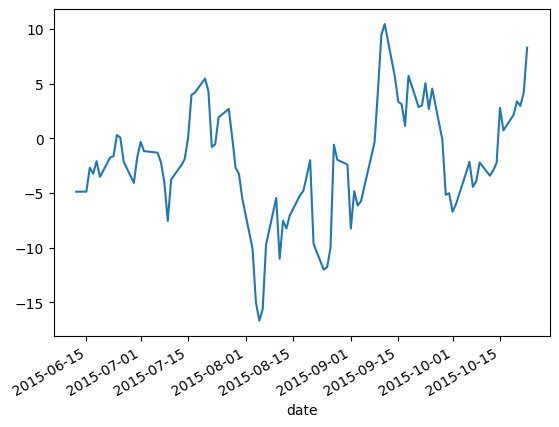

In [ ]:
df['Seasonal First Difference'].plot()

## Auto Regressive Model
![image.png](attachment:image.png)

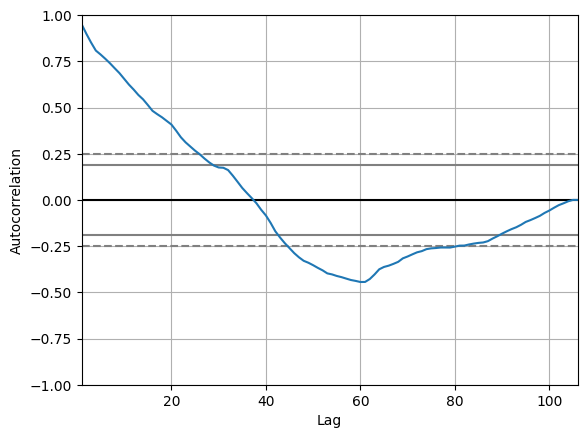

In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['close'])
plt.show()

### Final Thoughts on Autocorrelation and Partial Autocorrelation

* Identification of an AR model is often best done with the PACF.
    * For an AR model, the theoretical PACF “shuts off” past the order of the model.  The phrase “shuts off” means that in theory the partial autocorrelations are equal to 0 beyond that point.  Put another way, the number of non-zero partial autocorrelations gives the order of the AR model.  By the “order of the model” we mean the most extreme lag of x that is used as a predictor.
    
    
* Identification of an MA model is often best done with the ACF rather than the PACF.
    * For an MA model, the theoretical PACF does not shut off, but instead tapers toward 0 in some manner.  A clearer pattern for an MA model is in the ACF.  The ACF will have non-zero autocorrelations only at lags involved in the model.
    
    p,d,q
    p AR model lags
    d differencing
    q MA lags

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


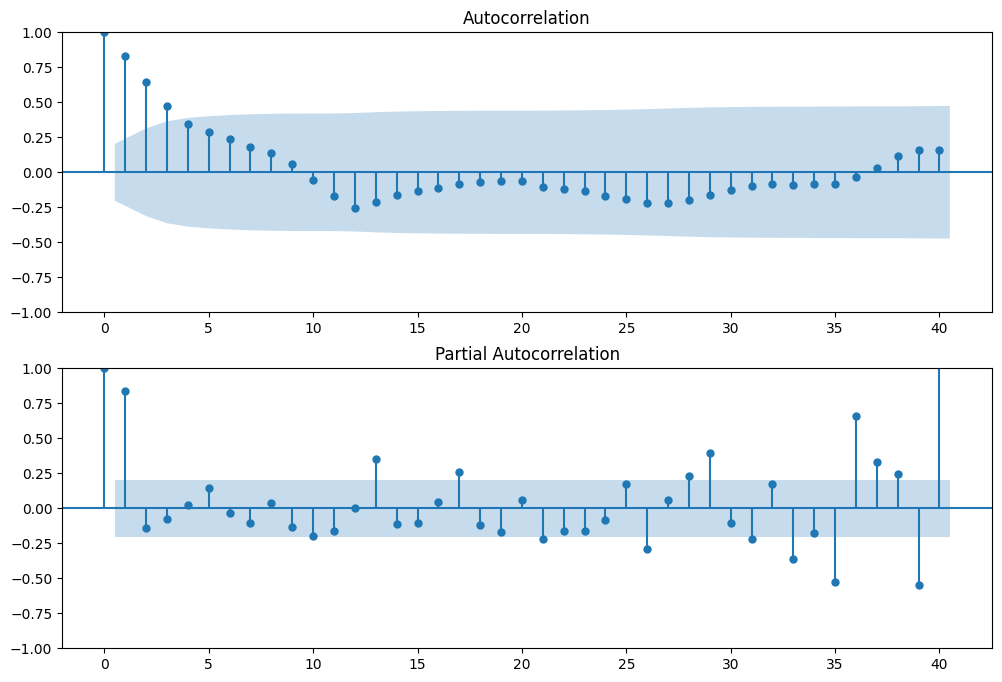

In [ ]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

In [ ]:
# For non-seasonal data
#p=1, d=1, q=0 or 1
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model=ARIMA(df['close'],order=(1,1,1))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
df.shape

(106, 3)

<ipython-input-129-830beb56e924>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)


<Axes: xlabel='date'>

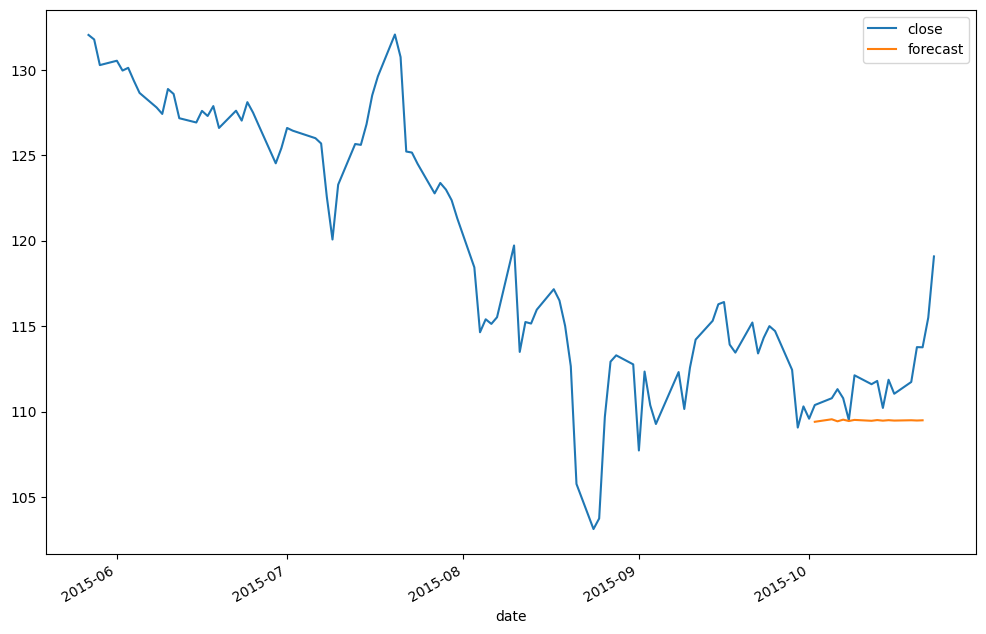

In [ ]:
df['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
df[['close','forecast']].plot(figsize=(12,8))

In [ ]:
import statsmodels.api as sm